# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

urls=[]
temp=[]
lat=[]
hum=[]
cloud=[]
wind=[]
name=[]

for city in cities:
    temperature_url=url+"q="+city+"&units=imperial"+"&appid="+api_key
    urls.append(temperature_url)

for url in urls:
    temp_data=requests.get(url).json()
    for data in temp_data:
        try:
            name.append(temp_data["name"])
            temp.append(temp_data["main"]["temp_max"])
            lat.append(temp_data["coord"]["lat"])
            hum.append(temp_data["main"]["humidity"])
            cloud.append(temp_data["clouds"]["all"])
            wind.append(temp_data["wind"]["speed"])
        except KeyError:
            print(f'City not found')

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_data=list(zip(name,lat,temp,hum,cloud,wind))
cities_data_df = pd.DataFrame(cities_data, columns = ['City name','Latitude','Temperature', 'Humidity','Cloudiness','Wind Speed'])
cities_df=cities_data_df.groupby(["City name"]).mean()
cities_df.to_csv("C:/Users/jdelga01/Desktop/API_Assigment/API_Assigment/Cities_df.csv")
cities_df

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
City name,,,,,
Acapulco,16.86,75.20,88,90,11.41
Adrar,27.87,91.40,13,0,12.75
Agdas,40.65,80.60,69,90,8.05
Airai,-8.93,84.11,52,84,3.94
Aklavik,68.22,60.80,67,75,6.93
Albany,42.65,75.20,83,75,4.32
Alice Springs,-23.70,68.00,28,0,12.75
Alindao,5.04,71.51,91,100,2.73
Alofi,-19.06,77.00,88,41,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

#### This graph is curious because you can actually see the earth curvature and how the sun hits the earth  relatively in the middle 

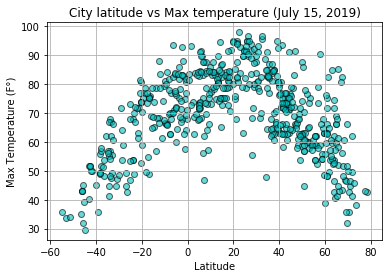

In [5]:
latitude=cities_df["Latitude"]
temperature=cities_df["Temperature"]

plt.scatter(latitude, temperature, marker="o", c="c", edgecolors="black", alpha=0.6)

plt.title("City latitude vs Max temperature (July 15, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.grid(True)

plt.savefig("C:/Users/jdelga01/Desktop/API_Assigment/API_Assigment/LatvsTemp.jpg", bbox_inches="tight")

## Latitude vs. Humidity Plot
#### Humidity behaves similarly to temperature. It seems humidity and temperature are related although northern and southern extreme values seem to have presence of humidity 

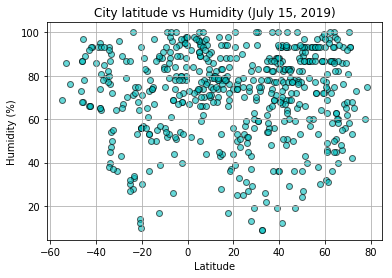

In [6]:
latitude=cities_df["Latitude"]
humidity=cities_df["Humidity"]

plt.scatter(latitude, humidity, marker="o", c="c", edgecolors="black", alpha=0.6)

plt.title("City latitude vs Humidity (July 15, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("C:/Users/jdelga01/Desktop/API_Assigment/API_Assigment/LatvsHumidity.jpg", bbox_inches="tight")

 ## Latitude vs. Cloudiness Plot
#### For cities near the equator, there are only few cases that present null cloudiness and most cases with some level of cloudiness are present in the north hemisphere 

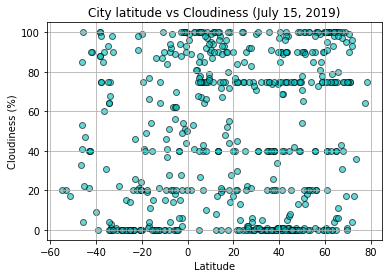

In [7]:
latitude=cities_df["Latitude"]
cloudiness=cities_df["Cloudiness"]

plt.scatter(latitude, cloudiness, marker="o", c="c", edgecolors="black", alpha=0.6)

plt.title("City latitude vs Cloudiness (July 15, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("C:/Users/jdelga01/Desktop/API_Assigment/API_Assigment/LatvsCloud.jpg", bbox_inches="tight")

## Latitude vs Wind speed
#### It seems that wind speed tends to be higher in the northern hemisphere but also there seems to be a relationship between the latitude and the wind speed. Extreme wind values seems to be located in the extreme latitudes 

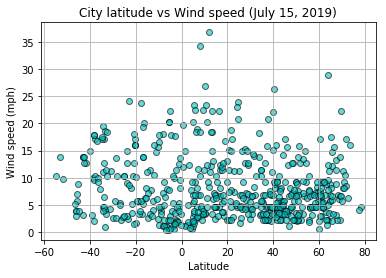

In [8]:
latitude=cities_df["Latitude"]
wind=cities_df["Wind Speed"]

plt.scatter(latitude, wind, marker="o", c="c", edgecolors="black", alpha=0.6)

plt.title("City latitude vs Wind speed (July 15, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.grid(True)
plt.savefig("C:/Users/jdelga01/Desktop/API_Assigment/API_Assigment/LatvsWind.jpg", bbox_inches="tight")